# Census APIs

Request a key at <https://api.census.gov/data/key_signup.html>

An email will be sent to the addres you provide. The email will include a link to activate the key. It may take a few minutes before the key can be activated.

In [92]:
import json
import requests
import pandas as pd
import matplotlib as plt

In [93]:
# Load API key

# Note the file with the API key is not in the GitHub repo.
# Keys need to be read from a local directory
with open("jwCensusApi", "r") as i:
    key = i.read()

## Identifying the Data Source

We are going to use the Census API to retrieve data to reproduce some of the statistics from the Feb 24, 2022, press release and infographic *A Higher Degree.*

**Press release:** <https://www.census.gov/newsroom/press-releases/2022/educational-attainment.html>

**Infographic:** <https://www.census.gov/library/visualizations/2022/comm/a-higher-degree.html>

Below is the infographic. Note that for today's workshop we are using only 2021 data.

<a class="embeddable-image__embedLink" href="https://www.census.gov/library/visualizations/2022/comm/a-higher-degree.html?cid=higher-degree" target="_blank"><img class="embeddable-image__embedImage" data-src="/library/visualizations/2022/comm/a-higher-degree/_jcr_content/root/responsivegrid/embeddableimage1119.coreimg.jpeg/1645624284211/educational-attainment-2022.jpeg" alt="A Higher Degree" title="A Higher Degree" src="https://www.census.gov/library/visualizations/2022/comm/a-higher-degree/_jcr_content/root/responsivegrid/embeddableimage1119.coreimg.jpeg/1645624284211/educational-attainment-2022.jpeg" width="1080" height="1080"></a>[Source: U.S. Census Bureau]

According to the press release, the data are from the *2000–2002 March Current Population Survey and 2003–2021 Annual Social and Economic Supplement to the Current Population Survey.*

### Q: How to get info on variables via API?

We can look it up online, but we may also get this info dynamically. 

#### Steps:

1. Go to the *Census Data API Discovery Tool*: <https://www.census.gov/data/developers/updates/new-discovery-tool.html>
1. Preview the datasets and available information using the HTML format: <https://api.census.gov/data.html>
1. Use HTTPS libraries ("requests") to download the data in JSON format.
1. Process the JSON.

In [94]:
# Request the JSON information about available datasets

datasets_url = "https://api.census.gov/data.json"
datasets_request = requests.get(datasets_url)
datasets_json = datasets_request.json()

In [95]:
datasets_json

{'@context': 'https://project-open-data.cio.gov/v1.1/schema/catalog.jsonld',
 '@id': 'http://api.census.gov/data/1999/nonemp.json',
 '@type': 'dcat:Catalog',
 'conformsTo': 'https://project-open-data.cio.gov/v1.1/schema',
 'describedBy': 'https://project-open-data.cio.gov/v1.1/schema/catalog.json',
 'dataset': [{'c_vintage': 1999,
   'c_dataset': ['nonemp'],
   'c_geographyLink': 'http://api.census.gov/data/1999/nonemp/geography.json',
   'c_variablesLink': 'http://api.census.gov/data/1999/nonemp/variables.json',
   'c_tagsLink': 'http://api.census.gov/data/1999/nonemp/tags.json',
   'c_examplesLink': 'http://api.census.gov/data/1999/nonemp/examples.json',
   'c_groupsLink': 'http://api.census.gov/data/1999/nonemp/groups.json',
   'c_sorts_url': 'http://api.census.gov/data/1999/nonemp/sorts.json',
   'c_valuesLink': 'http://api.census.gov/data/1999/nonemp/values.json',
   'c_documentationLink': 'http://www.census.gov/developer/',
   'c_isAggregate': True,
   'c_isCube': True,
   'c_isA

In [96]:
dataset_list = datasets_json["dataset"]
len(dataset_list)

1152

In [97]:
# This took a little sleuthing to find the dataset identifier.
# Why is the identifier not included in the press release or infographic?

# Get the titles of the datasets
dataset_list = datasets_json["dataset"]

# title: Current Population Survey Annual Social and Economic Supplement
# c_vintage: 2021
# id: https://api.census.gov/data/id/CPSASEC2021

cpd_asec_mar = [d for d in dataset_list if d["identifier"] == "https://api.census.gov/data/id/CPSASEC2021"]
print(json.dumps(cpd_asec_mar, indent=4)) # long output

[
    {
        "c_vintage": 2021,
        "c_dataset": [
            "cps",
            "asec",
            "mar"
        ],
        "c_geographyLink": "http://api.census.gov/data/2021/cps/asec/mar/geography.json",
        "c_variablesLink": "http://api.census.gov/data/2021/cps/asec/mar/variables.json",
        "c_tagsLink": "http://api.census.gov/data/2021/cps/asec/mar/tags.json",
        "c_examplesLink": "http://api.census.gov/data/2021/cps/asec/mar/examples.json",
        "c_groupsLink": "http://api.census.gov/data/2021/cps/asec/mar/groups.json",
        "c_sorts_url": "http://api.census.gov/data/2021/cps/asec/mar/sorts.json",
        "c_valuesLink": "http://api.census.gov/data/2021/cps/asec/mar/values.json",
        "c_documentationLink": "https://www.census.gov/developer/",
        "c_isMicrodata": true,
        "c_isCube": true,
        "c_isAvailable": true,
        "@type": "dcat:Dataset",
        "title": "Current Population Survey Annual Social and Economic Supplement",
   

In [98]:
# Get info on variables

dataset_vars_url = cpd_asec_mar[0]["c_variablesLink"]
dataset_vars_request = requests.get(dataset_vars_url)
datasets_vars_json = dataset_vars_request.json()
# print(json.dumps(datasets_vars_json, indent=4)) # long output - many variables

# just print the variable and the label
dataset_vars = datasets_vars_json["variables"]

# sort variable names
sorted_vars = sorted(dataset_vars.keys())

# View the first 10 variable, for example.
for k in sorted_vars[:10]:
    var_info = dataset_vars[k]
    print(k, ":", var_info["label"])

ACTC_CRD : additional chld tax credit
AGE1 : Demographics, Age recode, persons 15+ years
AGI : Federal adjusted gross income
ANN_VAL : Retirement income, annuities amount
ANN_YN : Retirement income, annuities, y/n
AXAGE : Allocation flag for A_AGE
AXCLSWKR : Allocation flag for A_CLSWKR
AXENRLW : Allocation flag for A_ENRLW
AXFTPT : Allocation flag for A_FTPT
AXHGA : Allocation flag for A_HGA


In [99]:
# Set the API endpoint URL for this dataset

endpoint = cpd_asec_mar[0]["distribution"][0]["accessURL"]
print(endpoint)

http://api.census.gov/data/2021/cps/asec/mar


In [100]:
# Get info on a single variable

var = "A_HGA"
var_def_url = endpoint + "/variables/" + var
var_def_request = requests.get(var_def_url)
var_json = var_def_request.json()
print(json.dumps(var_json, indent=4))

{
    "name": "A_HGA",
    "label": "Demographics, Educational attainment",
    "predicateType": "int",
    "group": "N/A",
    "limit": 0,
    "suggested-weight": "MARSUPWT",
    "values": {
        "item": {
            "35": "9th Grade",
            "41": "Assc degree-occupation/vocation",
            "0": "Children",
            "31": "Less Than 1st Grade",
            "44": "Master's degree (MA,MS,MENG,MED,MSW,MBA)",
            "43": "Bachelor's degree (BA,AB,BS)",
            "34": "7th and 8th grade",
            "38": "12th Grade No Diploma",
            "37": "11th Grade",
            "33": "5th Or 6th Grade",
            "45": "Professional school degree (MD,DDS,DVM,L",
            "39": "High school graduate-high school diploma",
            "32": "1st,2nd,3rd,or 4th grade",
            "40": "Some College But No Degree",
            "46": "Doctorate degree (PHD,EDD)",
            "36": "10th Grade",
            "42": "Assc degree-academic program"
        }
    }
}


In [101]:
'''
Variables of interest

A_HGA - educational attainment
AGE1 - age
AGI - federal adjusted gross income

NM FIPS ID = 35
'''

vars_list = ["A_HGA", "AGE1", "AGI"]
vars_dict = {}

for v in vars_list:
    var_def_url = endpoint + "/variables/" + v
    var_def_request = requests.get(var_def_url)
    var_json = var_def_request.json()
    vars_dict[v] = var_json

In [102]:
vars_dict

{'A_HGA': {'name': 'A_HGA',
  'label': 'Demographics, Educational attainment',
  'predicateType': 'int',
  'group': 'N/A',
  'limit': 0,
  'suggested-weight': 'MARSUPWT',
  'values': {'item': {'35': '9th Grade',
    '41': 'Assc degree-occupation/vocation',
    '0': 'Children',
    '31': 'Less Than 1st Grade',
    '44': "Master's degree (MA,MS,MENG,MED,MSW,MBA)",
    '43': "Bachelor's degree (BA,AB,BS)",
    '34': '7th and 8th grade',
    '38': '12th Grade No Diploma',
    '37': '11th Grade',
    '33': '5th Or 6th Grade',
    '45': 'Professional school degree (MD,DDS,DVM,L',
    '39': 'High school graduate-high school diploma',
    '32': '1st,2nd,3rd,or 4th grade',
    '40': 'Some College But No Degree',
    '46': 'Doctorate degree (PHD,EDD)',
    '36': '10th Grade',
    '42': 'Assc degree-academic program'}}},
 'AGE1': {'name': 'AGE1',
  'label': 'Demographics, Age recode, persons 15+ years',
  'predicateType': 'int',
  'group': 'N/A',
  'limit': 0,
  'suggested-weight': 'MARSUPWT',
  

## Tabulating Census Data

We can download the unweighted data, but that will not produce the same results as the infographic and press release.

Instead we will download the weighted data, in a "pre-tabulated" format. This means some aggregation has already been done. 

In [103]:
census_wtd_url = endpoint + "?tabulate=weight(MARSUPWT)&col+A_HGA&row+AGE1&for=state:*"
census_wtd_request = requests.get(census_wtd_url)
census_wtd_json = census_wtd_request.json()
# print(json.dumps(census_wtd_json, indent=4)) # long output

In [104]:
# Convert returned JSON to dataframe

# subset to rows with data (all but the first row, which has column headers)
drop_keys = census_wtd_json[1:]

# column headers - need additional processing
get_keys = census_wtd_json[0]

# read JSON data into a pandas data frame
w_df = pd.read_json(json.dumps(drop_keys), typ = "frame", orient = "values")

# add column headers
cols = []
for k in get_keys:
    if isinstance(k, dict):
        v = [e[:] for e in k.values()]
        cols.append(v[0])
    if isinstance(k, str):
        cols.append(k)
w_df.columns = cols

# create index on AGE1 variable
w_df.set_index("AGE1", inplace = True)

# sort on index (numeric sort)
w_df.sort_index(inplace = True)
print(w_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   35      18 non-null     int64
 1   41      18 non-null     int64
 2   0       18 non-null     int64
 3   31      18 non-null     int64
 4   44      18 non-null     int64
 5   43      18 non-null     int64
 6   34      18 non-null     int64
 7   38      18 non-null     int64
 8   37      18 non-null     int64
 9   33      18 non-null     int64
 10  45      18 non-null     int64
 11  39      18 non-null     int64
 12  32      18 non-null     int64
 13  40      18 non-null     int64
 14  46      18 non-null     int64
 15  36      18 non-null     int64
 16  42      18 non-null     int64
dtypes: int64(17)
memory usage: 2.5 KB
None


In [105]:
w_df.head()

,35,41,0,31,44,43,34,38,37,33,45,39,32,40,46,36,42
AGE1,,,,,,,,,,,,,,,,,
0,0,0,59938081,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1681838,729,0,4907,1979,5403,1588774,18507,89172,16646,0,50480,0,34640,0,672541,7567
2,1848048,7409,0,18881,3715,38273,227935,437006,2372533,23064,0,270160,19653,110498,1077,3282559,5421
3,92328,40503,0,13448,4965,48576,51529,644884,1782967,10011,0,2553580,5496,2210180,2563,266806,88093
4,51054,171027,0,15589,16770,222168,57125,202790,206899,7866,0,2919202,6153,4163847,0,85361,353451


In [106]:
w_df = w_df[sorted(w_df.columns)]

In [107]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       18 non-null     int64
 1   31      18 non-null     int64
 2   32      18 non-null     int64
 3   33      18 non-null     int64
 4   34      18 non-null     int64
 5   35      18 non-null     int64
 6   36      18 non-null     int64
 7   37      18 non-null     int64
 8   38      18 non-null     int64
 9   39      18 non-null     int64
 10  40      18 non-null     int64
 11  41      18 non-null     int64
 12  42      18 non-null     int64
 13  43      18 non-null     int64
 14  44      18 non-null     int64
 15  45      18 non-null     int64
 16  46      18 non-null     int64
dtypes: int64(17)
memory usage: 2.5 KB


In [108]:
w_df.head() # keep in mind our index labels and column names are coded - pandas will work with categorical vars as a dtype

,0,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
AGE1,,,,,,,,,,,,,,,,,
0,59938081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,4907,0,16646,1588774,1681838,672541,89172,18507,50480,34640,729,7567,5403,1979,0,0
2,0,18881,19653,23064,227935,1848048,3282559,2372533,437006,270160,110498,7409,5421,38273,3715,0,1077
3,0,13448,5496,10011,51529,92328,266806,1782967,644884,2553580,2210180,40503,88093,48576,4965,0,2563
4,0,15589,6153,7866,57125,51054,85361,206899,202790,2919202,4163847,171027,353451,222168,16770,0,0


In [109]:
# AGE1 >= 6 is the population 25 and over
w_df.loc[6:]

,0,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
AGE1,,,,,,,,,,,,,,,,,
6,0,35343,23674,91872,127343,186793,175782,354979,285213,6304709,3891482,903353,1405260,6668554,1752186,200201,185560
7,0,34359,51778,162482,192550,265218,230976,354031,279557,5627420,3437538,973138,1391684,6368638,2555902,311814,454176
8,0,47813,99229,277076,279523,310629,292238,300046,270560,5002109,3083392,876556,1383291,5746319,2714555,379479,544623
9,0,34124,112508,307977,298526,314869,269929,282743,283375,5039375,2743662,914820,1237130,5036686,2658149,394458,468306
10,0,70614,102854,302186,264782,236174,254245,265097,195381,4910132,2618376,926925,1263333,4735305,2426865,343381,490813
11,0,79748,124581,243927,292745,288878,222810,264511,226746,5508656,2772182,887994,1253221,4986696,2348562,283845,488343
12,0,56009,168202,279915,268934,259796,328561,342008,258558,6146782,2977981,1083822,1365380,4485108,1978130,280215,402983
13,0,38175,64194,115182,114680,86710,120957,186219,102333,2741130,1301734,455648,523512,1739547,842147,101909,143156
14,0,57663,96105,176266,148280,155248,154101,207214,141625,3840281,1894950,566989,789906,2643972,1132473,154738,257253


In [110]:
# get the sum of the population >= 25
sum_age_gte25 = w_df[6:].to_numpy().sum()
sum_age_gte25

224580155

Let's match some data points to the press release. Keeping in mind we are only using 2021 data, the press release says:

>    8.9% had less than a high school diploma or equivalent.  
    27.9% had high school graduate as their highest level of school completed.   
    14.9% had completed some college but not a degree.  
    10.5% had an associate degree as their highest level of school completed.  
    23.5% had a bachelor’s degree as their highest degree.  
    14.4% had completed an advanced degree such as a master’s degree, professional degree or doctoral degree.   


In [111]:
# Start with HS diploma as highest level of education attained (coded as 39 in A_HGA)
# here's the subset:
w_df[6:]["39"]

AGE1
6     6304709
7     5627420
8     5002109
9     5039375
10    4910132
11    5508656
12    6146782
13    2741130
14    3840281
15    5414577
16    4205280
17    7806866
Name: 39, dtype: int64

In [112]:
# here's the sum of the subset
w_df[6:]["39"].sum()

62547317

In [113]:
# assign that to a variable
hs_diploma = w_df[6:]["39"].sum()

In [114]:
# Divide by the total pop >= 25 yo to get the percentage. Press release rounds to 1 decimal point
round((hs_diploma/sum_age_gte25) * 100, 1) # This is the correct %

27.9

In [115]:
# some college, no degree (coded as "40" in A_HGA)
some_college = w_df[6:]["40"].sum()
round((some_college/sum_age_gte25) * 100, 1) # also the correct %

14.9

In [116]:
# let's use the same syntax to request multiple columns
# in this case for no HS diploma (codes 31-38 in this case)
no_hs_diploma = w_df[6:][["31", "32", "33", "34", "35", "36", "37", "38"]].to_numpy().sum()
round((no_hs_diploma/sum_age_gte25) * 100, 1) # also correct

8.9

## Plotting Census Data

<AxesSubplot:xlabel='AGE1'>

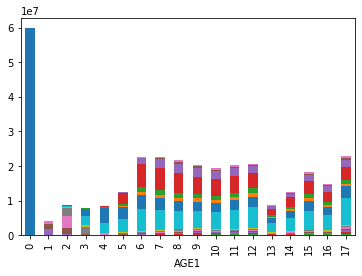

In [117]:
# plot the whole dataset as a stacked bar plot
w_df.plot.bar(stacked = True, legend = False) # ed attainment stacked bar plot (x = age, y = count of pop, colors = A_HGA)

<AxesSubplot:xlabel='AGE1'>

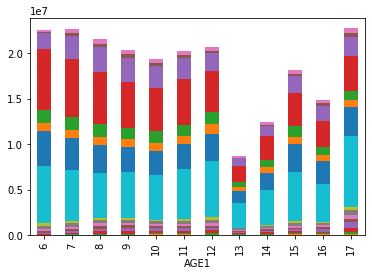

In [118]:
# we can use the same subsetting syntax as above to limit to population >= 25 yo
# ed attainment stacked bar plot (x = age, y = count of pop, colors = A_HGA)
w_df[6:].plot.bar(stacked = True, legend = False) 

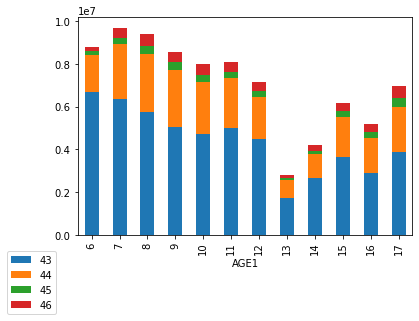

In [119]:
# The infographic charts bachelors degrees and higher, codes 43-46 in A_HGA
'''
    '43': "Bachelor's degree (BA,AB,BS)",
    '44': "Master's degree (MA,MS,MENG,MED,MSW,MBA)",
    '45': 'Professional school degree (MD,DDS,DVM,L',
    '46': 'Doctorate degree (PHD,EDD)'
'''
w_df[6:][["43", "44", "45", "46"]].plot.bar(stacked = True).legend(loc = "best", bbox_to_anchor = (-0.05, -0.05))

<AxesSubplot:>

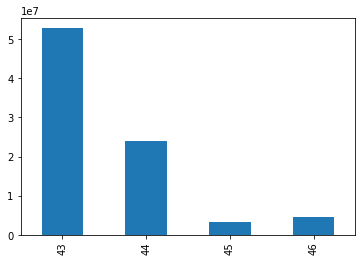

In [120]:
# the infographic is further aggregated - data are summed per educational attainment level
# across all ages groups
w_df[6:][["43", "44", "45", "46"]].sum().plot.bar(legend = False) # close! - note that the y scale is 10m

In [121]:
# Create a subset to work with
plot_data = pd.DataFrame(w_df[6:][["43", "44", "45", "46"]].sum())

# Give the new dataframe (a table of summed population per level of ed. attainment) a nice column name
plot_data.columns = ["2021"]

# look at it - the numbers match those in the infographic
plot_data

,2021
43,52805178
44,24058725
45,3443225
46,4729870


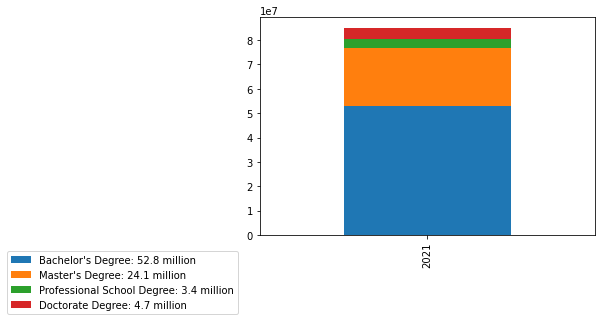

In [122]:
# Our version of the infographic
# get sum totals for legend
pop_bd = str(round(plot_data.loc["43"]["2021"]/1000000, 1))
pop_md = str(round(plot_data.loc["44"]["2021"]/1000000, 1))
pop_pd = str(round(plot_data.loc["45"]["2021"]/1000000, 1))
pop_dr = str(round(plot_data.loc["46"]["2021"]/1000000, 1))

# create a list of labels for the legend
# note that we could also have done the math here, but it would be harder to read
l = ["Bachelor's Degree: " + pop_bd + " million", 
     "Master's Degree: " + pop_md + " million", 
     "Professional School Degree: " + pop_pd + " million",
     "Doctorate Degree: " + pop_dr + " million"]

# plot with an intelligble legend
plot_data.T.plot.bar(stacked=True).legend(l, loc = "best", bbox_to_anchor = (-0.05, -0.05))